# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

In [3]:
# Print out the list of cities
cities

['bathsheba',
 'avarua',
 'jamestown',
 'richards bay',
 'rikitea',
 'albany',
 'dingle',
 'barentsburg',
 'bluff',
 'khorixas',
 'bethel',
 'iqaluit',
 'nouadhibou',
 'kulachi',
 'yellowknife',
 'hermanus',
 'kutulik',
 'puerto ayora',
 'dunedin',
 'anjozorobe',
 'zhanaozen',
 'port alfred',
 'talnakh',
 'cape town',
 'tuktoyaktuk',
 'kruisfontein',
 'hambantota',
 'nikolskoye',
 'utiroa',
 'petukhovo',
 'lipari',
 'busselton',
 'grand river south east',
 'bintulu',
 'ushuaia',
 'batagay-alyta',
 'castro',
 'meulaboh',
 'kalabo',
 'cherskiy',
 'bengkulu',
 'punta arenas',
 'lavrentiya',
 'rosarito',
 'bonthe',
 'vaini',
 'hithadhoo',
 'lata',
 'kargasok',
 'lolua',
 'mukhen',
 'taolanaro',
 'kapaa',
 'grand gaube',
 'asyut',
 'mataura',
 'upernavik',
 'boundiali',
 'airai',
 'kodiak',
 'qui nhon',
 'saldanha',
 'penzance',
 'saskylakh',
 'hwange',
 'leh',
 'hobart',
 'east london',
 'sitka',
 'longyearbyen',
 'vaitupu',
 'illoqqortoormiut',
 'san cristobal',
 'vestmannaeyjar',
 'water

In [13]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL 
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + city).json

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
# Set up lists to hold response info
city_name = []
lat = []
lng = []
temp_max = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each 
for city in cities:
        try:
            response = requests.get(query_url + city).json()
            city_name.append(response['name'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            temp_max.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            wind_speed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            print(f"Processing Record {city}")
        except KeyError:
            print("City not found")
            pass

Processing Record bathsheba
Processing Record avarua
Processing Record jamestown
Processing Record richards bay
Processing Record rikitea
Processing Record albany
Processing Record dingle
City not found
Processing Record bluff
Processing Record khorixas
Processing Record bethel
Processing Record iqaluit
Processing Record nouadhibou
Processing Record kulachi
Processing Record yellowknife
Processing Record hermanus
Processing Record kutulik
Processing Record puerto ayora
Processing Record dunedin
Processing Record anjozorobe
Processing Record zhanaozen
Processing Record port alfred
Processing Record talnakh
Processing Record cape town
Processing Record tuktoyaktuk
Processing Record kruisfontein
Processing Record hambantota
Processing Record nikolskoye
City not found
Processing Record petukhovo
Processing Record lipari
Processing Record busselton
City not found
Processing Record bintulu
Processing Record ushuaia
Processing Record batagay-alyta
Processing Record castro
Processing Record me

Processing Record ayagoz
Processing Record la ligua
Processing Record haines junction
Processing Record sri aman
Processing Record middelburg
Processing Record merrill
Processing Record nyurba
Processing Record novopavlovka
Processing Record lompoc
City not found
City not found
Processing Record bosaso
Processing Record pozo colorado
Processing Record kattivakkam
Processing Record mgandu
Processing Record kungurtug
Processing Record chicama
Processing Record grindavik
City not found
Processing Record san jose
Processing Record seminole
Processing Record itaueira
Processing Record palana
Processing Record butajira
Processing Record dzhebariki-khaya
Processing Record presidente medici
Processing Record tommot
Processing Record imeni poliny osipenko
Processing Record ekhabi
Processing Record santa isabel do rio negro
Processing Record voh
Processing Record chingirlau
Processing Record khorramshahr
Processing Record honiara
Processing Record lady frere
Processing Record porto santo
Process

In [14]:
# Create a Data Frame from above results
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bathsheba,13.2167,-59.5167,26.00,73,75,8.75,BB,1612055253
1,Avarua,-21.2078,-159.7750,28.00,74,75,3.09,CK,1612055234
2,Jamestown,42.0970,-79.2353,-7.78,79,1,1.42,US,1612054994
3,Richards Bay,-28.7830,32.0377,23.14,94,100,0.91,ZA,1612055253
4,Rikitea,-23.1203,-134.9692,26.43,70,0,4.80,PF,1612055253


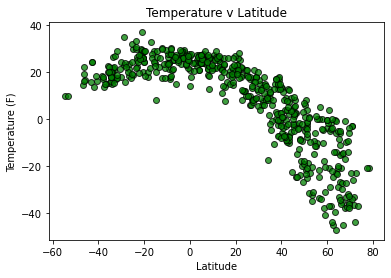

In [32]:
# Temperature (F) vs. Latitude Scatterplot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()

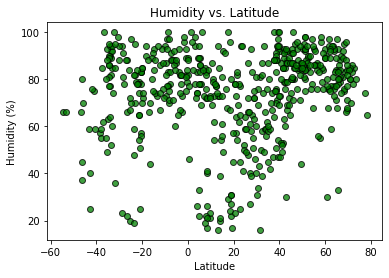

In [33]:
# Humidity (%) vs. Latitude Scatterplot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

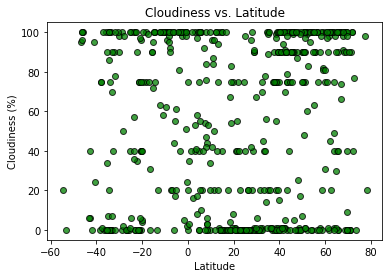

In [34]:
# Cloudiness (%) vs. Latitude Scatterplot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

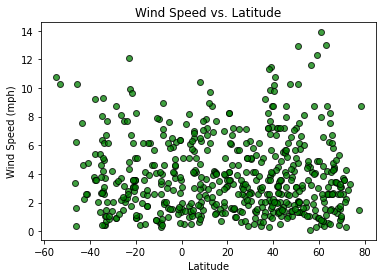

In [35]:
# Wind Speed (mph) vs. Latitude Scatterplot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression